# Quantum metrology notebook

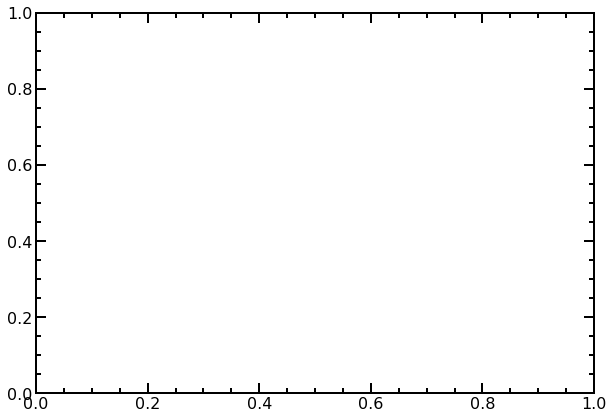

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import scipy.linalg
from qutip.qip.operations import*

(-110.0, 110.0, -1.059530064845351, 1.098072860230731)

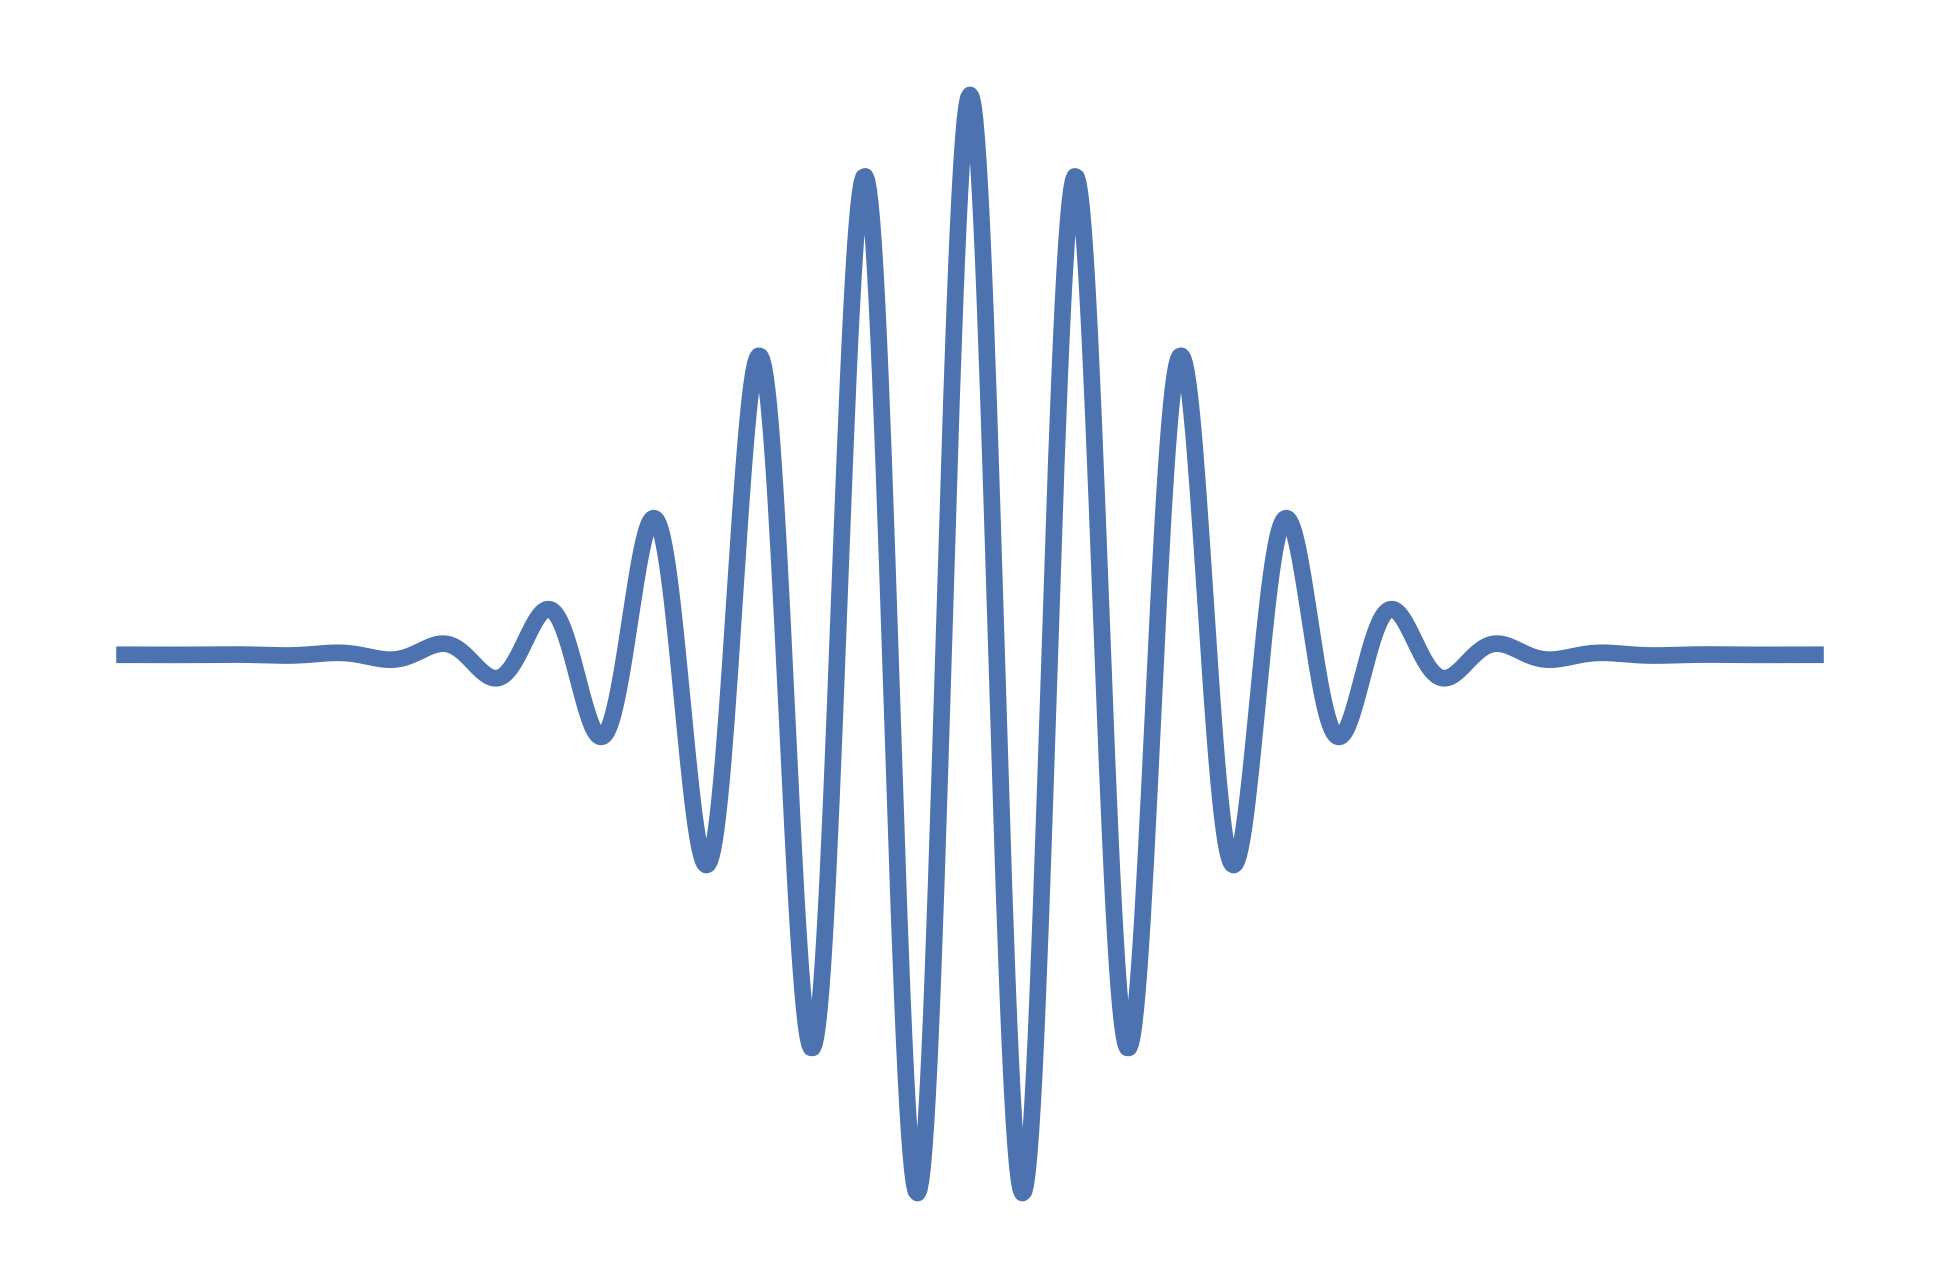

In [144]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
x = np.linspace(-100,100,1001)
y = np.exp(-x**2/1000)*np.cos(x/2)
plt.plot(x,y)
plt.axis('off')

# figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/SCQ summary/'
# plt.savefig(figpath + 'pulse.eps')

## State tomography

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.40909091+0.j         0.27272727-0.40909091j]
 [0.27272727+0.40909091j 0.59090909+0.j        ]]


<Figure size 2800x2800 with 0 Axes>

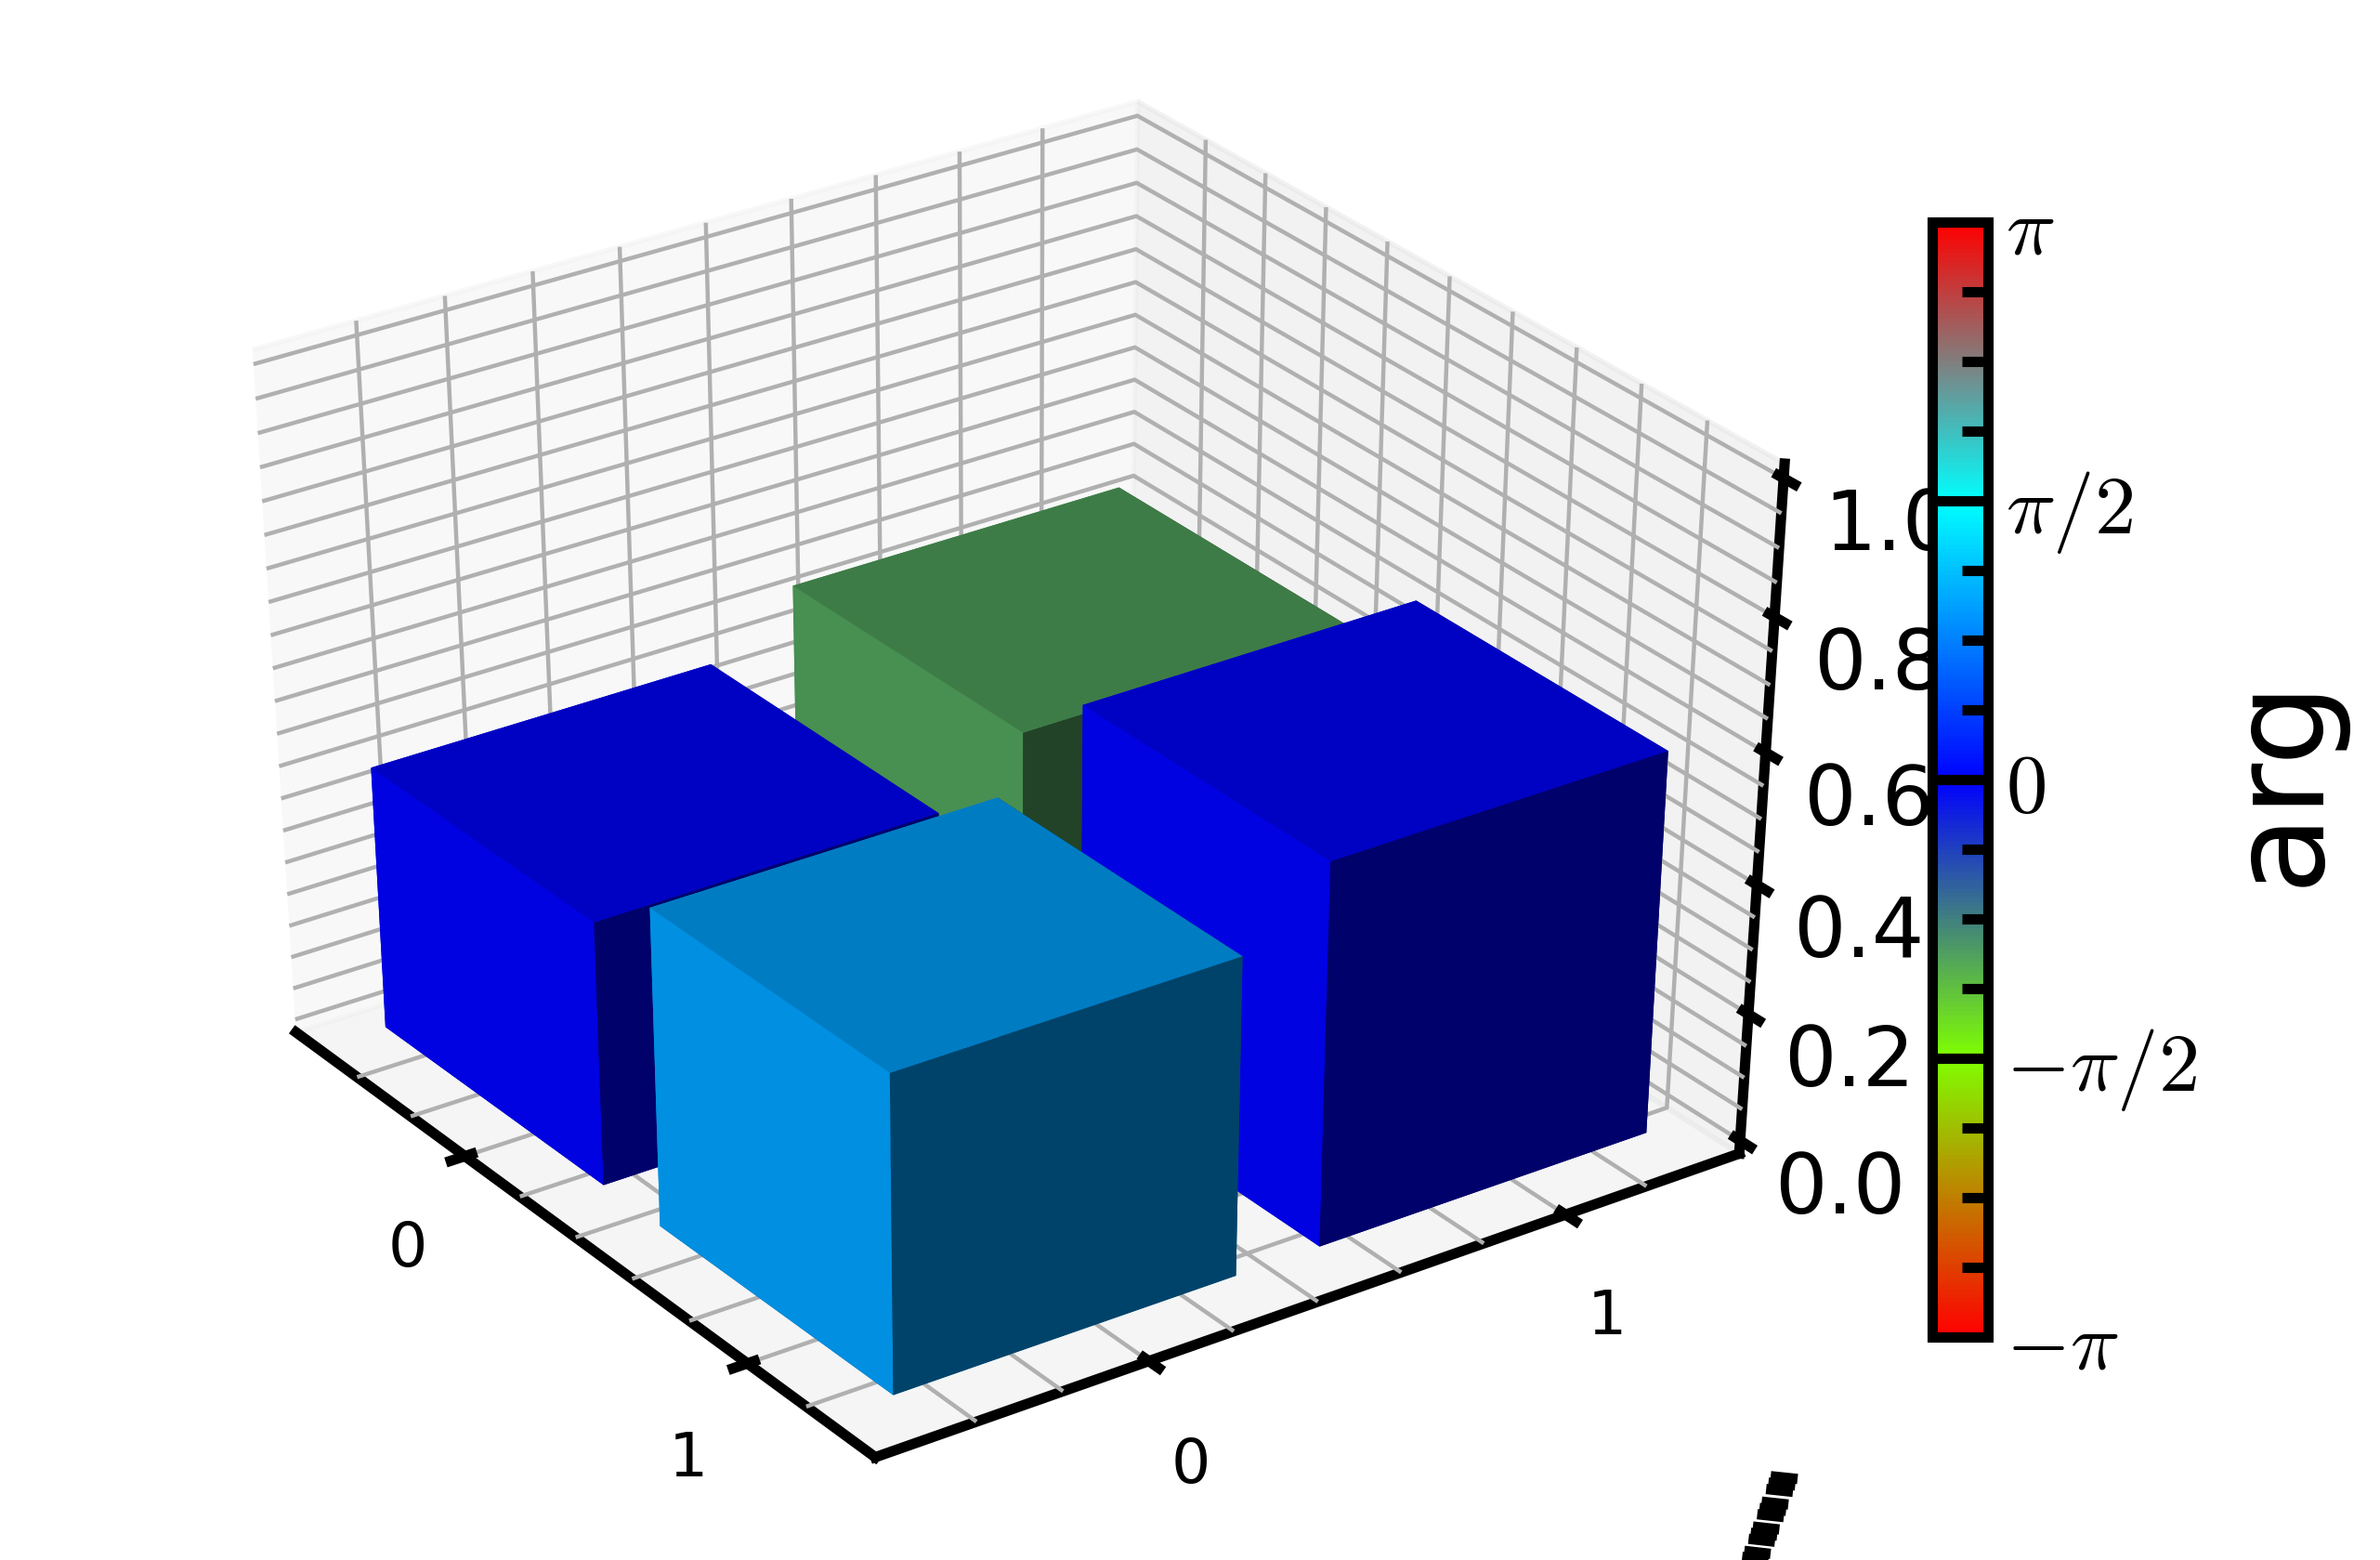

In [77]:
#State tomography
plt.figure(figsize=[7,7])
psi0 = basis(2,0)
psi1 = basis(2,1)
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
rho = ket2dm(psi)
matrix_histogram_complex(rho)
print (rho)

(<Figure size 2400x1600 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fd0ffe62dc0>)

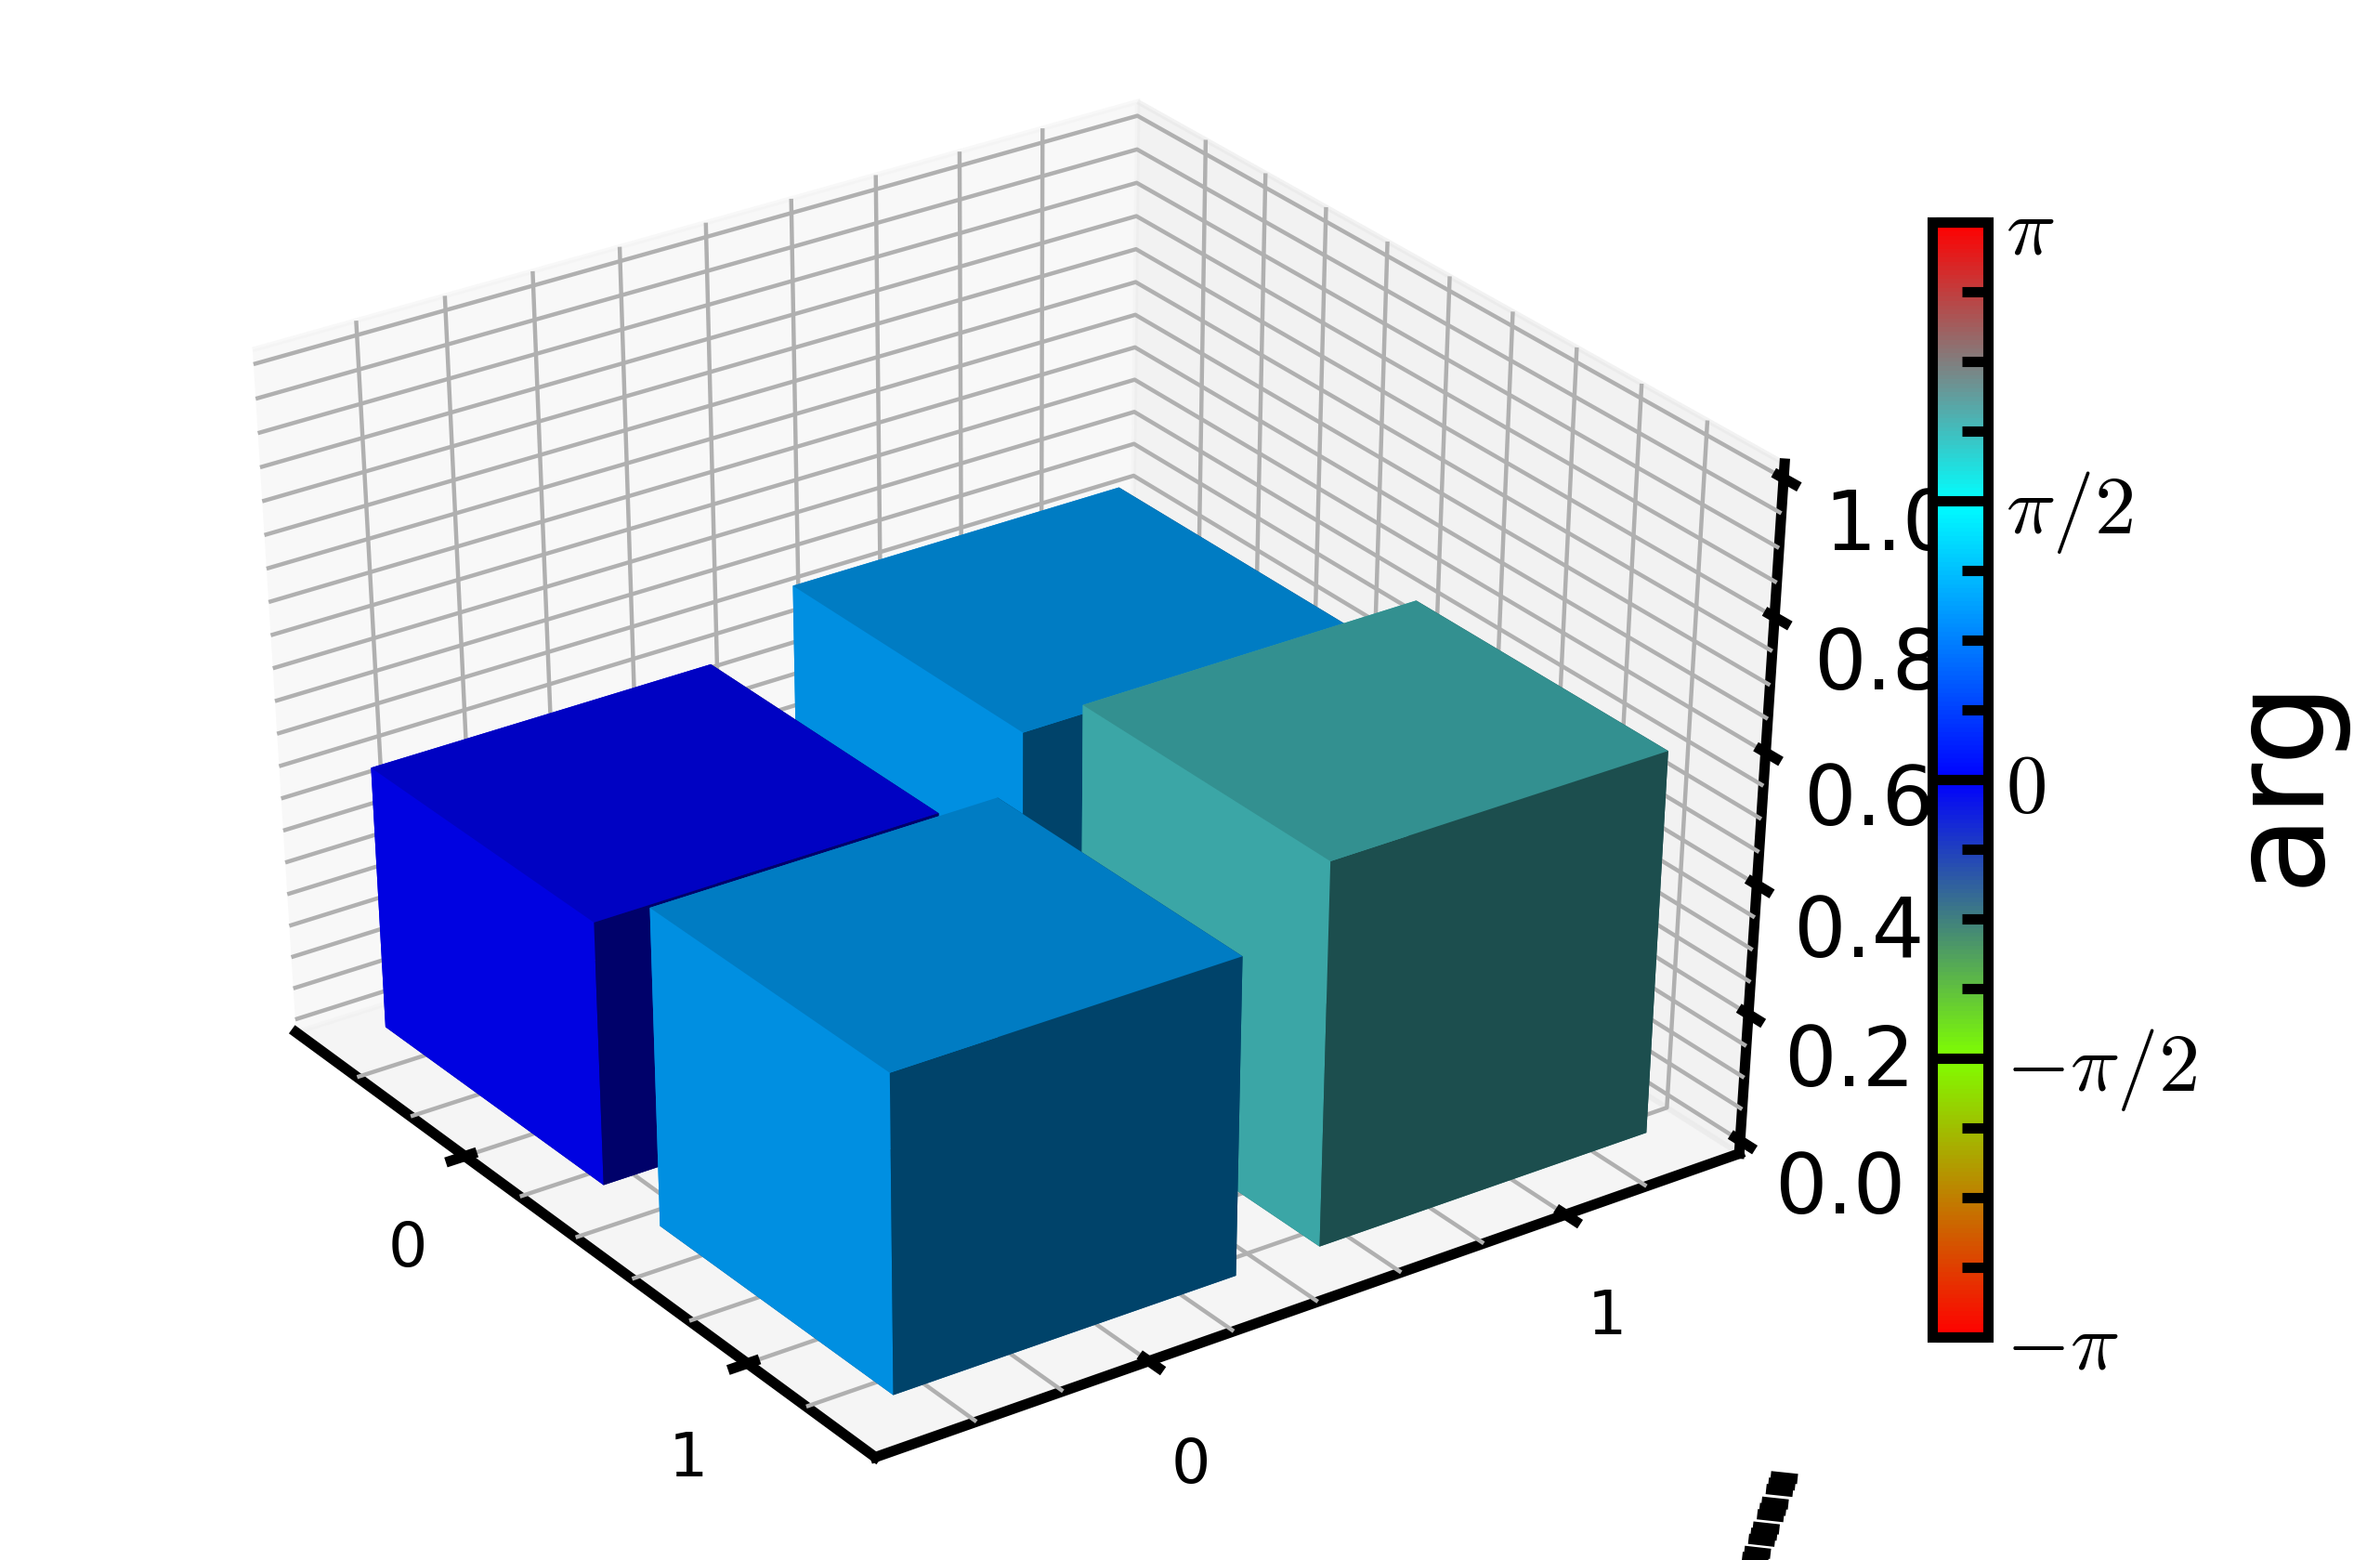

In [78]:
#Can also define matrices
psi0 = np.matrix([1,0]).transpose()
psi1 = np.matrix([0,1]).transpose()
a=3
b=3j+2
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
# psi = Qobj(psi)
# rho = ket2dm(psi)
#or
rho = psi*psi.transpose()
rho = Qobj(rho)
matrix_histogram_complex(rho)

## Quantum fidelity

See http://qutip.org/docs/4.0.2/modules/qutip/metrics.html

Definition: 

a. State fidelity
$$ \mathcal{F}(\rho,\sigma)=\left(\mathrm{Tr}\sqrt{\rho^{1/2}\sigma\rho^{1/2}} \right)^2$$
from which the fidelity between a pure state $|\psi \rangle$ and an arbitrary state $\rho$ can be written as
$$\mathcal{F}(\rho,\psi)=\sqrt{\langle\psi |\rho |\psi\rangle}$$

b. Process fidelity

If the $\chi$ matrix is known, then the fidelity to the ideal state $\chi'$ is 
$$ \mathcal{F}(\chi,\chi')=\left(\mathrm{Tr}\sqrt{\chi^{1/2}\chi '\chi^{1/2}} \right)^2$$

From Pedersen et al., the fidelity between two unitary operations $U$ and $U_o$ is
$$\mathcal{F}=\frac{1}{N(N+1)}\left[\mathrm{Tr}(MM^\dagger) + |\mathrm{Tr}(M)|^2 \right],$$
with $M=U_0^\dagger U$ and $N=2^n$ is the dimension of the Hilbert space

In [79]:
#Using qutip's built in fidelity functions
from qutip import fidelity
psi0 = basis(2,0)
psi1 = basis(2,1)
a=1
b=1
psi = (a*psi0 + b*psi1)/np.sqrt(abs(a)**2+abs(b)**2)
print("state fidelity between 0 and 1: ", fidelity(psi0,psi1))
print("state fidelity between 1 and 1:", fidelity(psi1,psi1))
print("state fidelity between 1 and superposition:", fidelity(psi1,psi))

from qutip.qip.operations import cnot
from qutip.qip.operations import csign
from qutip import process_fidelity
cz = csign()
iden = identity(4)
print("process fidelity between cz and cnot: ", process_fidelity(cz,cnot()))
print("process fidelity between cz and cz: ", process_fidelity(cz,cz))
# print("process fidelity between cz and I: ", process_fidelity(cz,iden))

#Or define it ourselves
rho0 = np.array([[1,0],[0,0]])
rho1 = np.array([[0,0],[0,1]])
rho = np.array([[1,1],[1,1]])/np.sqrt(2)


def state_fidelity_func(rho,rho_ideal):
    f = abs(np.trace(scipy.linalg.sqrtm(scipy.linalg.sqrtm(rho_ideal).dot(rho).dot(scipy.linalg.sqrtm(rho_ideal)))))
    return f**2

def process_fidelity_func(U,U_ideal,qubit_num):
    N = 2**qubit_num
    coeff = (N*(N+1))**-1.0
    M = np.conj(U_ideal.transpose()) * U
    f = np.trace(M*np.conj(M.transpose())) + np.trace(M)**2
    return coeff * f

print ('State fidelity as defined, 0 and 1: ', state_fidelity_func(rho0,rho1))    
print ('State fidelity as defined, 0 and 0: ',state_fidelity_func(rho0,rho0))    
print ('State fidelity as defined, 0 and superposition: ', state_fidelity_func(rho0,rho))    
U_cz = np.diag([1,1,1,-1])
U_cnot = np.diag([1,1,0,0])
U_cnot[2,3] = 1
U_cnot[3,2] = 1
U_iden = np.diag([1,1,1,1])
print("Defined process fidelity between cz and cnot: ", process_fidelity_func(U_cz,U_cnot, 2))
print("Defined process fidelity between cz and cz: ", process_fidelity_func(U_cz,U_cz, 2))


state fidelity between 0 and 1:  0.0
state fidelity between 1 and 1: 1.0
state fidelity between 1 and superposition: 0.7071067811865475
process fidelity between cz and cnot:  0.5
process fidelity between cz and cz:  1.0
State fidelity as defined, 0 and 1:  0.0
State fidelity as defined, 0 and 0:  1.0
State fidelity as defined, 0 and superposition:  0.7071067811865471
Defined process fidelity between cz and cnot:  0.30000000000000004
Defined process fidelity between cz and cz:  1.0


# Pauli Transfer Matrix (PTM)

<ipython-input-147-b8cab15d020a>:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm = np.linalg.lstsq(p_in, p_out)[0]


(<Figure size 3200x2400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0caef92e0>)

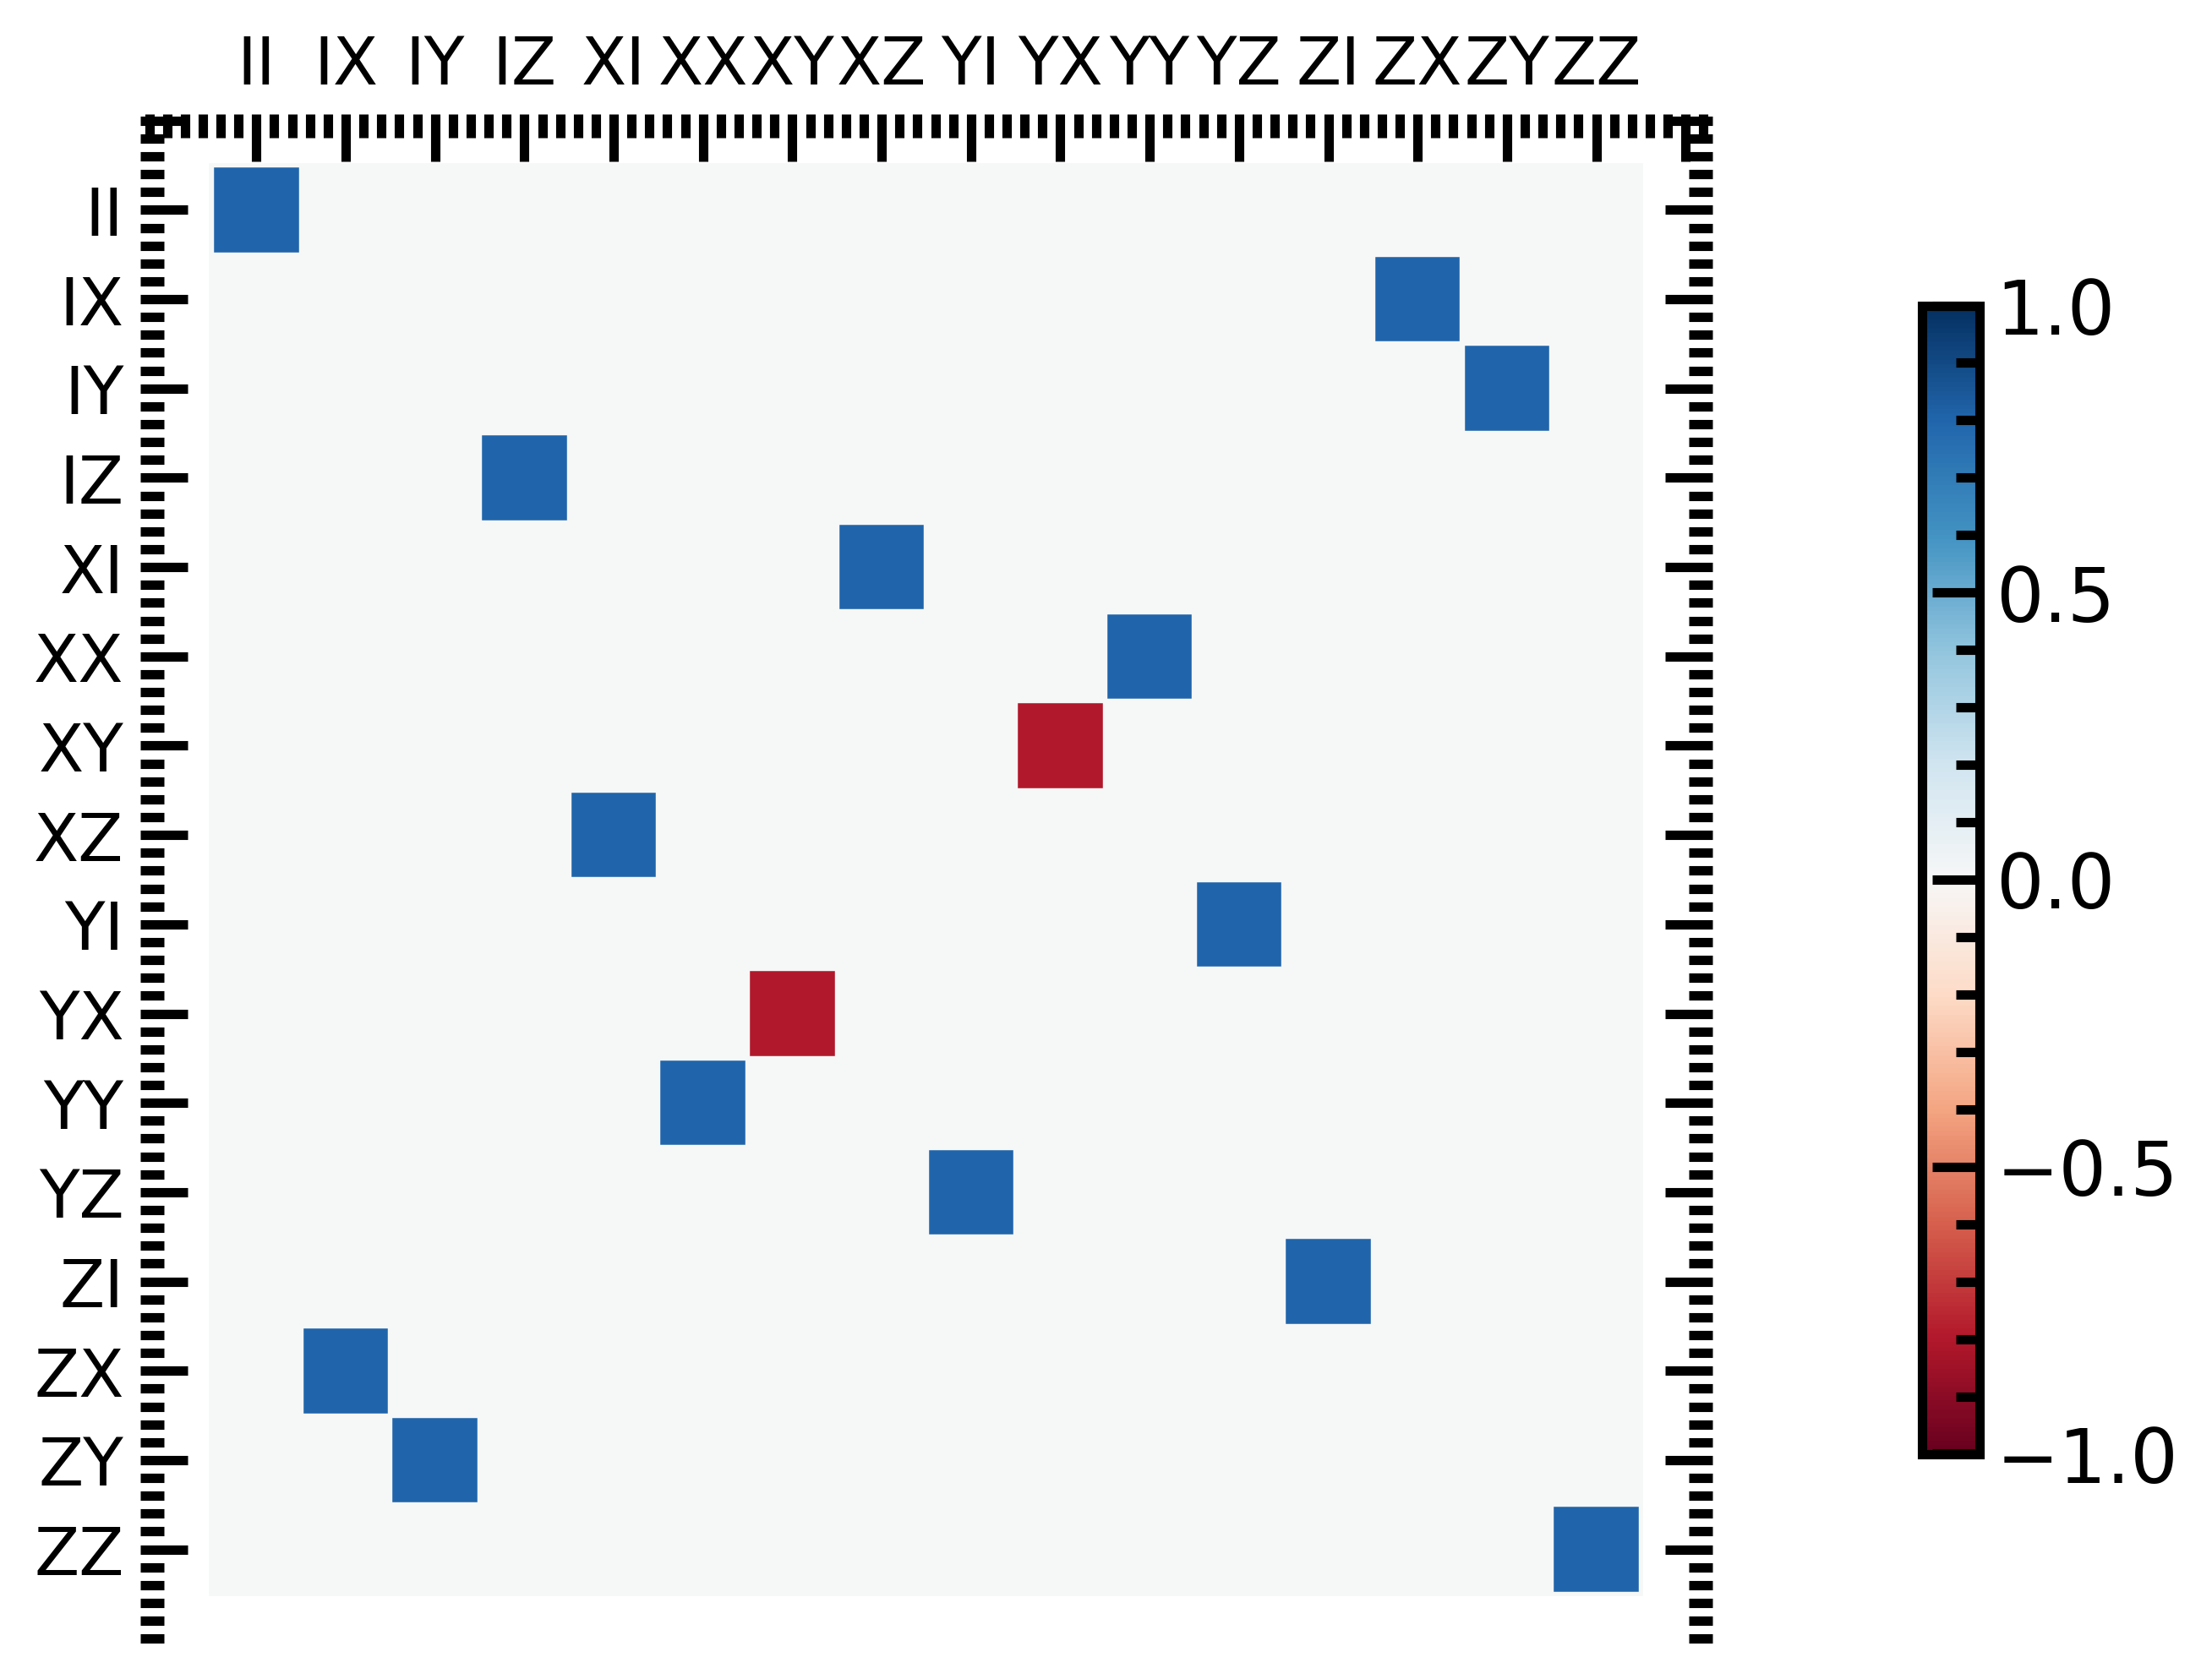

In [147]:
# II = tensor(qeye(2), qeye(2))
# IX = tensor(qeye(2), sigmax())
# IY = tensor(qeye(2), sigmay())
# IZ = tensor(qeye(2), sigmaz())

# XI = tensor(sigmax(), qeye(2))
# XX = tensor(sigmax(), sigmax())
# XY = tensor(sigmax(), sigmay())
# XZ = tensor(sigmax(), sigmaz())

# YI = tensor(sigmay(), qeye(2))
# YX = tensor(sigmay(), sigmax())
# YY = tensor(sigmay(), sigmay())
# YZ = tensor(sigmay(), sigmaz())

# ZI = tensor(sigmaz(), qeye(2))
# ZX = tensor(sigmaz(), sigmax())
# ZY = tensor(sigmaz(), sigmay())
# ZZ = tensor(sigmaz(), sigmaz())

prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
gate_op = cphase(np.pi)
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        p_out[i,j] = expect(rot_j, gate_op*(rot_i*gnd_state))        
ptm = np.linalg.lstsq(p_in, p_out)[0]

str_primitive = ["I","X","Y","Z"]
op_label = []
for prim1 in str_primitive:
    for prim2 in str_primitive:
        op_label.append(prim1+prim2)
# print (op_label)
qutip.hinton(ptm, xlabels = op_label, ylabels = op_label)

<ipython-input-16-078ff66c5033>:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_ideal =  np.linalg.lstsq(p_out, p_in)[0]


(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f941638a640>)

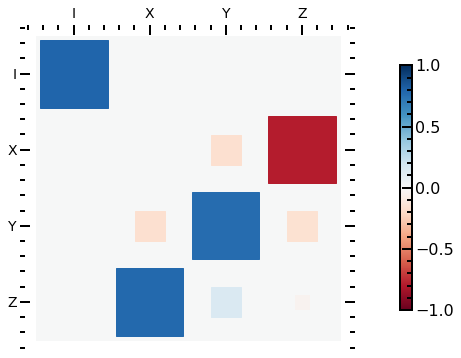

In [16]:
I = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sx2 = rx(np.pi/2)
sy2 = ry(np.pi/2)
p_in = np.zeros((4,4))
p_out = np.zeros((4,4))

gate = ry(np.pi/2)

prep_rotations = [I, sx, sx2, sy2]
meas_rotations = [I, sx, sy, sz]
for i, prep in enumerate(prep_rotations):
    for j, meas in enumerate(meas_rotations):
        p_in[i,j] = expect(meas, prep*basis(2,0))
        p_out[i,j] = expect(meas, rx(-0.2)*rz(0.2)*gate*prep*basis(2,0))
        
ptm_ideal =  np.linalg.lstsq(p_out, p_in)[0]      
op_label = ["I","X","Y","Z"]
qutip.hinton(ptm_ideal, xlabels = op_label, ylabels = op_label)

## 